<a href="https://colab.research.google.com/github/ANadjia/SocialMediaSentimentAnalyzer/blob/code/multilingue_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


* 2neutral=2333
* 0irrelevant=1689
* 1negative=572
* 3positive =519




In [ ]:

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/FinalData/multiC.csv")
df= df.sample(frac=1)
#df.Sentiment.value_counts()
df.head(10)

,Index,tweet,class
282,282,ac dc a bascul hier soir la ralit aujourdhui...,0
12343,12343,jaimerais que je sois pay pour danser aussi i...,0
12910,12910,jaimerais sil vous plait,1
10761,10761,كن انت تتغير اجل احد,1
11198,11198,ربنا يكتر امثالك يامصطفي,1
15435,15435,jai t malade toute la semaine je manque mes a...,0
13262,13262,je viens de sortir du lit alors je fais des t...,1
525,525,aujourdhui tait tellement gnial mon camarade d...,1
6331,6331,البرادعي شريك الانقلاب يهاجم الجيش والشرطه وال...,0
4964,4964,the food was barely lukewarm so it must have b...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


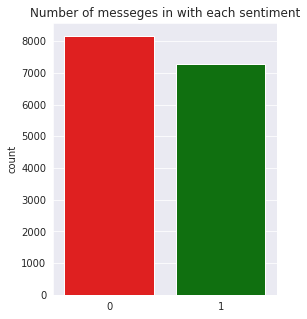

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(4, 5))
sns.countplot(df['class'], palette=['red', 'green','blue','pink','black'])
plt.title('Number of messeges in with each sentiment')
plt.xlabel("")
plt.show()

In [ ]:
X = df['tweet'].astype(str)
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42 , stratify=y)
len(np.unique(y))


2

In [ ]:
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences

train = X_train.values.tolist()
sentencens = list()
for line in train :
  words = line.split(' ')
  words = [word for word in words if word != '' and len(word)>2]
  sentencens.append(words)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentencens)
encoded_docs = tokenizer.texts_to_sequences(sentencens)
max_length = 300
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

#encoder = LabelEncoder()
#encoder.fit(y_train)
#Ytrain = encoder.transform(y_train)
Ytrain=y_train
test = X_test.values.tolist()
sentencens = list()
for line in test :
  words = line.split(' ')
  words = [word for word in words if word != '' and len(word)>2]
  sentencens.append(words)

encoded_docs = tokenizer.texts_to_sequences(sentencens)
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#encoder.fit(y_test)
#Ytest = encoder.transform(y_test)
Ytest = y_test
vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)



31360


In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/ModelEss/tokenizer_data.pkl', 'wb') as handle:
    pickle.dump(
        {'tokenizer': tokenizer, 'num_words':vocab_size, 'maxlen':max_length}, handle)

In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dropout, Bidirectional,LSTM
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding 
from keras.layers import Activation, Dense
 
from keras.regularizers import l2



from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced', np.unique(y_train), 
                y_train))) 
from tensorflow.keras.layers import Embedding, LSTM,Conv1D,GlobalMaxPooling1D, MaxPooling1D,Dense,Bidirectional,Flatten## Neural networks layers 


def biLSTM(vocab_size, max_words, label_num):
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=300, input_length=max_words))
  model.add(Bidirectional( LSTM(units=64,return_sequences=True)))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
#Output  Layer
  model.add(Dense(1, activation='sigmoid')) 


  return model


#Ytrain = to_categorical(Ytrain)
label_num = 2
max_words = 300


optimizer = keras.optimizers.Nadam(learning_rate=0.0001)


#my_callbacks = [  tf.keras.callbacks.EarlyStopping(patience=3),
    #tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    #]

model = biLSTM(vocab_size,max_words,label_num)
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(Xtrain, Ytrain, batch_size=20, epochs=8,   validation_data=(Xtest, Ytest))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          9408000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 128)          186880    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300, 128)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4915328   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/ModelEss/model_741')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/ModelEss/model_741/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/ModelEss/model_741/assets


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
y_test= model.predict(Xtest)
y_test= np.round(y_test, 0)

print('\t\t\tPERFORMANCE\n')
print('Accuracy:', round(accuracy_score(Ytest, y_test), 4), '\n')
print(classification_report(Ytest, y_test))

			PERFORMANCE

Accuracy: 0.741 

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1633
           1       0.73      0.72      0.72      1456

    accuracy                           0.74      3089
   macro avg       0.74      0.74      0.74      3089
weighted avg       0.74      0.74      0.74      3089



In [ ]:
from tensorflow.keras.optimizers import SGD,RMSprop
opt = RMSprop(lr=0.001)
from tensorflow.keras.layers import Embedding, LSTM,Conv1D,GlobalMaxPooling1D, MaxPooling1D,Dense,Bidirectional,Flatten## Neural networks layers 
from tensorflow.keras.models import Sequential 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:


def CNN_attia(vocab_size, max_words, label_num):
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=300, input_length=max_words))
  model.add(Dropout(0.2))
  model.add(Conv1D(activation="relu", padding="valid", filters=filter_size, kernel_size=7))
  model.add(GlobalMaxPooling1D())
  model.add(Dropout(0.2))

  model.add(Dense(600, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  return model


import numpy as np

label_num = len(np.unique(Ytrain))

max_words = 300
filter_size = 300
net_size = 600
epochs = 1


my_callbacks = [  tf.keras.callbacks.EarlyStopping(patience=3),
    ]

model = CNN_attia(vocab_size,max_words,label_num)
print(model.summary())
optimizer = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(Xtrain, Ytrain, batch_size=20, epochs=5, validation_data=(Xtest, Ytest))


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 300, 300)          9379500   
_________________________________________________________________
dropout_10 (Dropout)         (None, 300, 300)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 294, 300)          630300    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 300)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 600)               180600    
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

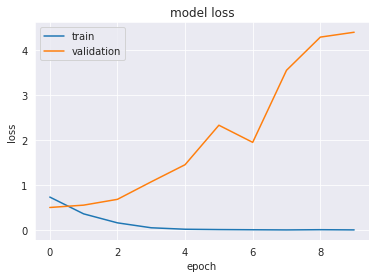

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



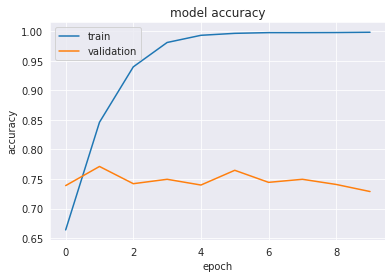

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def predictionF(nombre):
      if (nombre>0.5) : return 'Positive'
      return 'Negative'

phrase1 = ['i highly recommend you buy this product ']
phrase2=[' Je regrette avoir acheté  ce produit , il est nul   ']
phrase3 = ['منتوج جيد بجودة عالية ']
phrase4 = ['je ne suis pas sur de racheter ']

seq1= tokenizer.texts_to_sequences(phrase1)
seq2= tokenizer.texts_to_sequences(phrase2)
seq3= tokenizer.texts_to_sequences(phrase3)
seq4= tokenizer.texts_to_sequences(phrase4)


data1 = pad_sequences(seq1, maxlen= 300 , padding='post')
data2 = pad_sequences(seq2, maxlen= 300 , padding='post')
data3 = pad_sequences(seq3, maxlen= 300 , padding='post')
data4 = pad_sequences(seq4, maxlen= 300 , padding='post')

prediction1=model.predict(data1)
prediction2=model.predict(data2)
prediction3=model.predict(data3)
prediction4=model.predict(data4)

print('Predection\n 1: ',predictionF(prediction1) ,'\n 2: ',predictionF(prediction2),'\n 3: ',predictionF(prediction3),'\n 4: ',predictionF(prediction4))





Predection
 1:  Positive 
 2:  Negative 
 3:  Positive 
 4:  Negative
